In [10]:
from scipy import signal
import numpy as np
import librosa
import matplotlib.pyplot as plt

# Convolution

In [11]:
d_file = "dataset/auds/set1.wav"
d1_file = "dataset/auds/set2.wav"

d, sr = librosa.load(d_file, sr=8000)
d1, sr1 = librosa.load(d1_file, sr=8000)

In [12]:
def plot(y, sr, title, x_lab="Time (s)", y_lab="Amplitude", pt=plt.plot):
    """
        y: signal
        sr: sampling rate
        title: title of the plot
    """
    t = np.linspace(0, len(y)/sr, len(y))
    pt(t, y, lw=1)
    plt.title(title)
    plt.xlabel(x_lab)
    plt.ylabel(y_lab)
    plt.grid(True)

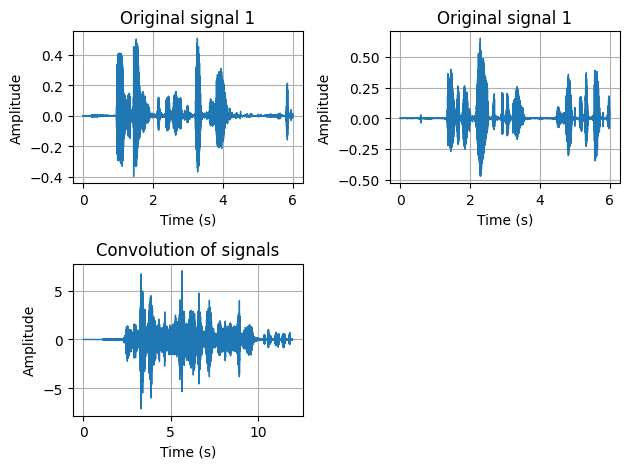

In [13]:
plt.subplot(2, 2, 1)
plot(d, sr, "Original signal 1")
plt.subplot(2, 2, 2)
plot(d1, sr1, "Original signal 1")

# convolution
y = signal.convolve(d, d1)

plt.subplot(2, 2, 3)
plot(y, sr, "Convolution of signals")
plt.tight_layout()
plt.show()

# Correlation

## Auto Correlation

In [14]:
d_file = "dataset/auds/speech.wav"

d, sr = librosa.load(d_file, sr=8000)

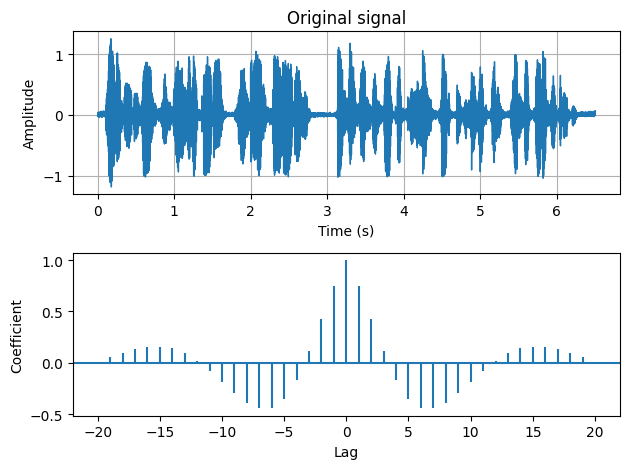

In [15]:
plt.subplot(2, 1, 1)
plot(d, sr, "Original signal")

plt.subplot(2, 1, 2)
r = librosa.autocorrelate(d, max_size=1000)
plt.acorr(r, maxlags=20)
plt.xlabel("Lag")
plt.ylabel("Coefficient")
plt.tight_layout()
plt.show()

## Cross Correlation

In [16]:
d_file = "dataset/auds/sample1.wav"
d1_file = "dataset/auds/sample2.wav"

d, sr = librosa.load(d_file, sr=8000)
d1, sr1 = librosa.load(d1_file, sr=8000)

In [17]:
correlation = np.correlate(d, d1, mode="full")

lags = np.arange(-100, 100)


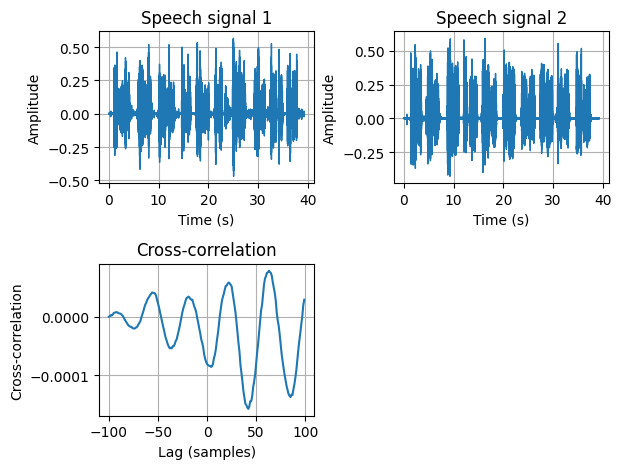

In [18]:
plt.subplot(2, 2, 1)
plot(d, sr, "Speech signal 1")

plt.subplot(2, 2, 2)
plot(d1, sr1, "Speech signal 2")

plt.subplot(2, 2, 3)
plt.plot(lags, correlation[0:200])

plt.title("Cross-correlation")
plt.xlabel("Lag (samples)")
plt.ylabel("Cross-correlation")
plt.grid(True)
plt.tight_layout()
plt.show()